### Notebook for training

Make sure you have run the download_data script (or notebook) beforehand.

Let's first begin by importing from our source files:

In [1]:
from src.dataloader import Dataloader
from src.train import Trainer
from src.model import UNet

2024-12-21 06:39:51.659856: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-21 06:39:51.671687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 06:39:51.783902: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-21 06:39:51.884489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734759591.973162    1192 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734759591.99

Then we can load the datasets for training and validation:

Found 800 files.
Using 640 files for training.
Using 160 files for validation.


2024-12-21 06:39:55.593206: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 64 files.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0335965].


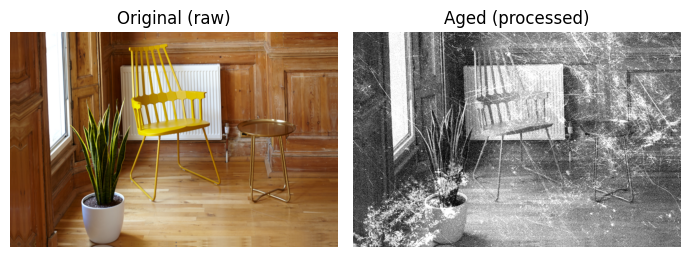

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.044590384..1.0191145].


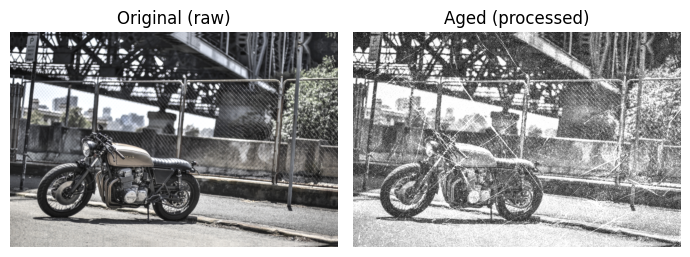

In [2]:
image_dir = "../data/div2k-hr-train/"
texture_dir = "../data/textures/"
color_mode = "rgb"

dataloader = Dataloader(
    image_dir,
    texture_dir,
    image_size=(32 * 21, 32 * 32),  # = (672, 1024)
    batch_size=8,
    color_mode=color_mode,
    validation_split=0.2,
)

train_ds, val_ds = dataloader.load_datasets(
    noisy=True,
    textured=True,
    texture_alpha=0.1,
    shuffle=True,
)

dataloader.show_samples(2)

Now we are prepared to train the model:

In [4]:
# instantiate the model
model = UNet(color_mode=color_mode)

# instantiate the trainer
trainer = Trainer(
    model=model,
    train_ds=train_ds,
    val_ds=val_ds,
    checkpoint_filepath="../checkpoints/checkpoint.weights.h5",
    epochs=10,
    learning_rate=1e-3,
)

# run the training loop
# trainer.train(num_samples_shown=4)

/home/arian/projects/image-restoration/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
